# Stratified GridSearchCV

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [23]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [24]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

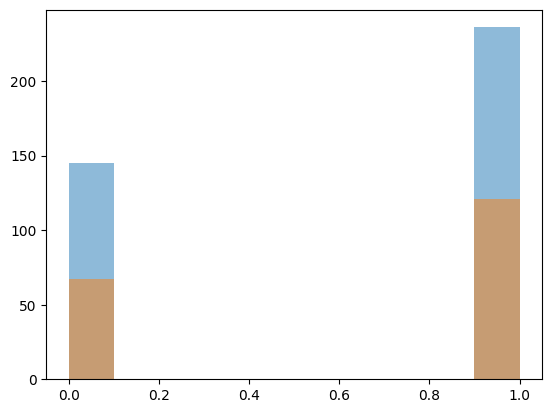

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


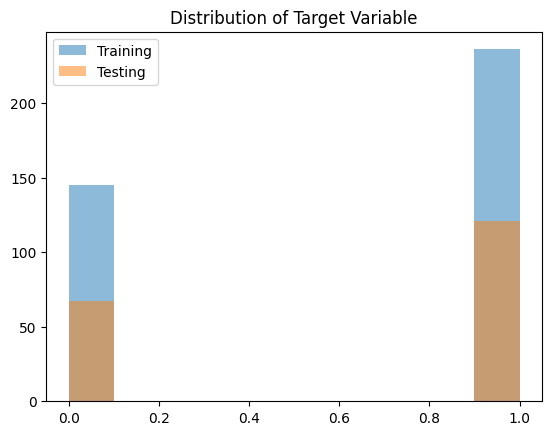

SVM with RBF kernel accuracy: 0.9521
SVM with Polynomial kernel accuracy: 0.9415
Linear SVM accuracy: 0.9362
Logistic Regression accuracy: 0.9574

Best model: Logistic Regression with an accuracy of 0.9574


/home/konrad/.local/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/konrad/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/konrad/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(1)
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5, label='Training')
plt.hist(y_test, alpha=0.5, label='Testing')
plt.title('Distribution of Target Variable')
plt.legend()
plt.show()

models = {
    'SVM with RBF kernel': SVC(kernel='rbf', random_state=42),
    'SVM with Polynomial kernel': SVC(kernel='poly', degree=3, random_state=42),
    'Linear SVM': LinearSVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} accuracy: {accuracy:.4f}')

best_model = max(results, key=results.get)
print(f'\nBest model: {best_model} with an accuracy of {results[best_model]:.4f}')


In [26]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [28]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [54]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003883,0.000272,0.001877,0.000496,0.0001,0.0001,"{'C': 0.0001, 'gamma': 0.0001}",0.623377,0.618421,0.618421,...,0.619412,0.001982,8,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
1,0.004491,0.000123,0.001924,0.000080,0.0001,0.001,"{'C': 0.0001, 'gamma': 0.001}",0.623377,0.618421,0.618421,...,0.619412,0.001982,8,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
2,0.005099,0.000097,0.001773,0.000120,0.0001,0.01,"{'C': 0.0001, 'gamma': 0.01}",0.623377,0.618421,0.618421,...,0.619412,0.001982,8,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
3,0.005105,0.000031,0.001713,0.000084,0.0001,0.1,"{'C': 0.0001, 'gamma': 0.1}",0.623377,0.618421,0.618421,...,0.619412,0.001982,8,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005
4,0.005099,0.000126,0.001755,0.000097,0.0001,1,"{'C': 0.0001, 'gamma': 1}",0.623377,0.618421,0.618421,...,0.619412,0.001982,8,0.618421,0.619672,0.619672,0.619672,0.619672,0.619422,0.0005


TypeError: Only length-1 arrays can be converted to Python scalars

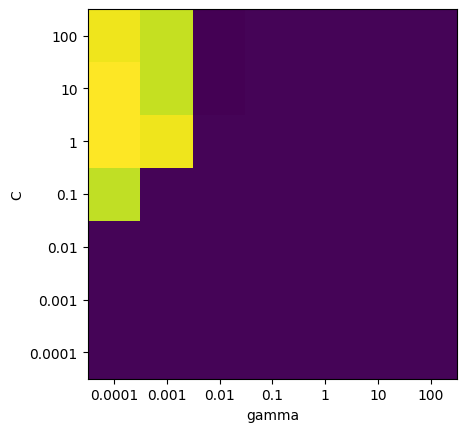

In [53]:
scores = np.array(results.mean_test_score).reshape(7, 7)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")



plt.show()

# Zad

Popraw greed i narysuj rysunek

* 0.0001

In [31]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)
grid_1.fit(X_train, y_train)
print("Best parameters:", grid_1.best_params_)

Best parameters: {'C': 1, 'gamma': 0.0001}


TypeError: Only length-1 arrays can be converted to Python scalars

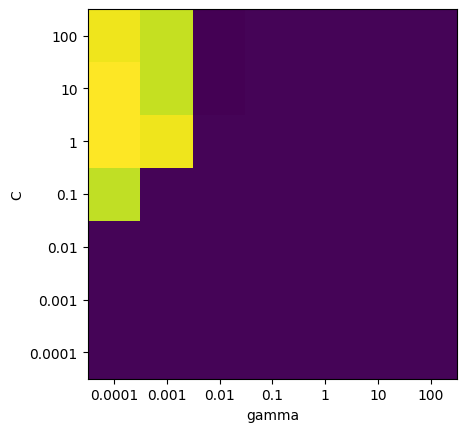

In [43]:
import pandas as pd

results = pd.DataFrame(grid_1.cv_results_)
scores = np.array(results.mean_test_score).reshape(7, 7) 

#heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [35]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.967479674796748
recall_score: 0.9834710743801653
f1_score: 0.9754098360655737
accuracy_score: 0.9680851063829787


In [36]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.96748,0.983471,0.97541,0.968085


In [37]:
from sklearn import metrics


best_model = grid_1.best_estimator_
y_pred = best_model.predict(X_test)

print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Precision: 0.967479674796748
Recall: 0.9834710743801653
F1 Score: 0.9754098360655737
Accuracy: 0.9680851063829787


In [38]:
d = {'precision_score': [metrics.precision_score(y_test, y_pred)],
     'recall_score': [metrics.recall_score(y_test, y_pred)],
     'f1_score': [metrics.f1_score(y_test, y_pred)],
     'accuracy_score': [metrics.accuracy_score(y_test, y_pred)]}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf'])
print(df)

    Method  precision_score  recall_score  f1_score  accuracy_score
0  SVM rbf          0.96748      0.983471   0.97541        0.968085
